In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tab = pd.read_csv("2022_Test_ML.csv")

In [3]:
tab["d1"] = tab["d"].apply(lambda x: int(2*x))
tab["d2"] = 2*tab["d"] - tab["d1"]
tab["h_p_inverse"] = 1/tab["h_p"]

In [4]:
tab.head()

,ind,s_mt,s_mq,d,h_p,QW,DP,d1,d2,h_p_inverse
0,0,1.409218,1.954108,2.867735,7.811623,1504.175621,501.563016,5,0.735471,0.128014
1,1,1.382565,2.006212,1.545090,8.124248,1240.530500,377.163158,3,0.090180,0.123088
2,2,1.622445,1.386172,1.192385,7.354709,1385.191155,457.404772,2,0.384770,0.135967
3,3,1.786172,1.591984,2.350701,4.324649,1602.841975,1429.795145,4,0.701403,0.231233
4,4,1.995591,2.024449,1.208417,6.993988,1326.290979,514.009143,2,0.416834,0.142980


In [5]:
del tab["ind"]

In [6]:
tab_QW = tab["QW"]
del tab["QW"]
del tab["DP"]

In [7]:
tab.head()

,s_mt,s_mq,d,h_p,d1,d2,h_p_inverse
0,1.409218,1.954108,2.867735,7.811623,5,0.735471,0.128014
1,1.382565,2.006212,1.545090,8.124248,3,0.090180,0.123088
2,1.622445,1.386172,1.192385,7.354709,2,0.384770,0.135967
3,1.786172,1.591984,2.350701,4.324649,4,0.701403,0.231233
4,1.995591,2.024449,1.208417,6.993988,2,0.416834,0.142980


In [8]:
X_full, X_test, y_full, y_test = train_test_split(tab, tab_QW, random_state=239, test_size=0.2)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, random_state=239, test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_train[["d1", "d2", "h_p"]])

StandardScaler()

In [12]:
len(X_train), len(X_val), len(X_test)

(320, 80, 100)

In [13]:
from sklearn.linear_model import Ridge

In [14]:
model_interpretable = Ridge()

In [15]:
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)

Ridge()

In [16]:
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(preds_train, y_train), r2_score(preds_val, y_val) 

(0.38522415280621314, 0.37468716813873104)

In [19]:
model_interpretable = Ridge(alpha=2)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val) 

(0.38136943717023486, 0.3703445743571534)

In [20]:
model_interpretable = Ridge(alpha=0.5)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.38713978816707106, 0.37684564652670915)

In [21]:
model_interpretable = Ridge(alpha=0.25)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.3880946751657941, 0.37792168104187607)

In [22]:
model_interpretable = Ridge(alpha=0.1)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.38866666953572293, 0.37856627624496186)

In [23]:
model_interpretable = Ridge(alpha=0.01)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.38900952853693704, 0.37895266418291973)

In [24]:
model_interpretable = Ridge(alpha=0.001)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.38904380051015663, 0.37899128774784374)

In [25]:
model_interpretable = Ridge(alpha=0.0001)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.3890472275682092, 0.37899514995204675)

In [26]:
model_interpretable = Ridge(alpha=0.00001)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.3890475702726218, 0.37899553617094417)

In [27]:
model_interpretable = Ridge(alpha=0.000001)
model_interpretable.fit(scaler.transform(X_train[["d1", "d2", "h_p"]]), y_train)
preds_train = model_interpretable.predict(scaler.transform(X_train[["d1", "d2", "h_p"]]))
preds_val = model_interpretable.predict(scaler.transform(X_val[["d1", "d2", "h_p"]]))
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.3890476045430492, 0.37899557479281876)

In [28]:
model_interpretable.coef_, model_interpretable.intercept_

(array([  63.72433837,   40.07717974, -106.45716141]), 1493.954719449811)

In [29]:
from catboost import CatBoostRegressor
from catboost import Pool
import numpy as np

In [30]:
X_train["rand"] = np.random.uniform(size=len(X_train))

<Axes: >

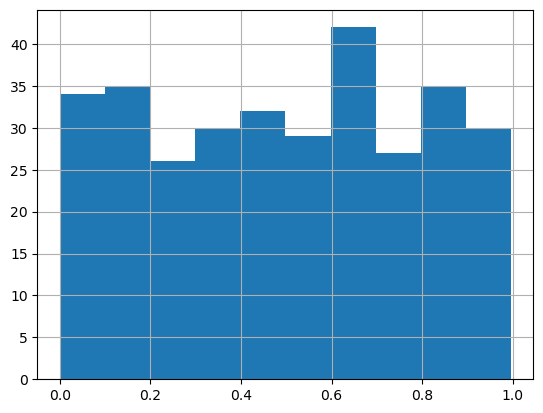

In [31]:
X_train["rand"].hist()

In [32]:
model_arbitrary = CatBoostRegressor()

In [33]:
model_arbitrary.fit(X_train, y_train)

Learning rate set to 0.034197
0:	learn: 162.9465505	total: 142ms	remaining: 2m 21s
1:	learn: 160.1050626	total: 143ms	remaining: 1m 11s
2:	learn: 157.1337455	total: 145ms	remaining: 48.1s
3:	learn: 154.0226827	total: 146ms	remaining: 36.4s
4:	learn: 151.3875614	total: 148ms	remaining: 29.4s
5:	learn: 148.7924623	total: 149ms	remaining: 24.7s
6:	learn: 146.5463901	total: 150ms	remaining: 21.3s
7:	learn: 143.8804447	total: 152ms	remaining: 18.9s
8:	learn: 141.3628552	total: 154ms	remaining: 16.9s
9:	learn: 138.8290686	total: 156ms	remaining: 15.4s
10:	learn: 136.5053046	total: 157ms	remaining: 14.1s
11:	learn: 134.3037877	total: 159ms	remaining: 13.1s
12:	learn: 131.9406792	total: 160ms	remaining: 12.2s
13:	learn: 129.9377571	total: 162ms	remaining: 11.4s
14:	learn: 127.9345470	total: 164ms	remaining: 10.7s
15:	learn: 125.7455146	total: 165ms	remaining: 10.1s
16:	learn: 124.0592636	total: 167ms	remaining: 9.63s
17:	learn: 122.1954318	total: 168ms	remaining: 9.18s
18:	learn: 120.5342998	t

186:	learn: 34.8310457	total: 383ms	remaining: 1.66s
187:	learn: 34.7357003	total: 385ms	remaining: 1.66s
188:	learn: 34.5043883	total: 386ms	remaining: 1.66s
189:	learn: 34.3968941	total: 387ms	remaining: 1.65s
190:	learn: 34.2521591	total: 388ms	remaining: 1.65s
191:	learn: 34.0860901	total: 390ms	remaining: 1.64s
192:	learn: 33.9740536	total: 391ms	remaining: 1.64s
193:	learn: 33.8087197	total: 392ms	remaining: 1.63s
194:	learn: 33.6182406	total: 394ms	remaining: 1.63s
195:	learn: 33.4809902	total: 395ms	remaining: 1.62s
196:	learn: 33.4119974	total: 397ms	remaining: 1.62s
197:	learn: 33.1893123	total: 398ms	remaining: 1.61s
198:	learn: 33.0322453	total: 399ms	remaining: 1.61s
199:	learn: 32.9879378	total: 401ms	remaining: 1.6s
200:	learn: 32.8198078	total: 402ms	remaining: 1.6s
201:	learn: 32.7053003	total: 403ms	remaining: 1.59s
202:	learn: 32.5732970	total: 405ms	remaining: 1.59s
203:	learn: 32.5386161	total: 407ms	remaining: 1.59s
204:	learn: 32.4848276	total: 408ms	remaining: 1

472:	learn: 15.4334823	total: 752ms	remaining: 837ms
473:	learn: 15.3932773	total: 753ms	remaining: 836ms
474:	learn: 15.3476415	total: 755ms	remaining: 834ms
475:	learn: 15.3300155	total: 756ms	remaining: 832ms
476:	learn: 15.2766730	total: 757ms	remaining: 830ms
477:	learn: 15.2491889	total: 759ms	remaining: 828ms
478:	learn: 15.2272452	total: 760ms	remaining: 826ms
479:	learn: 15.1896240	total: 761ms	remaining: 824ms
480:	learn: 15.1729267	total: 762ms	remaining: 823ms
481:	learn: 15.1467939	total: 764ms	remaining: 821ms
482:	learn: 15.1226077	total: 766ms	remaining: 820ms
483:	learn: 15.1053383	total: 767ms	remaining: 818ms
484:	learn: 15.0689027	total: 768ms	remaining: 816ms
485:	learn: 15.0228527	total: 770ms	remaining: 814ms
486:	learn: 14.9846636	total: 771ms	remaining: 812ms
487:	learn: 14.9569400	total: 772ms	remaining: 810ms
488:	learn: 14.9243141	total: 773ms	remaining: 808ms
489:	learn: 14.9079055	total: 774ms	remaining: 806ms
490:	learn: 14.8853459	total: 776ms	remaining:

765:	learn: 8.7548411	total: 1.12s	remaining: 342ms
766:	learn: 8.7416086	total: 1.12s	remaining: 341ms
767:	learn: 8.7279090	total: 1.12s	remaining: 339ms
768:	learn: 8.6957465	total: 1.13s	remaining: 338ms
769:	learn: 8.6812705	total: 1.13s	remaining: 337ms
770:	learn: 8.6757059	total: 1.13s	remaining: 335ms
771:	learn: 8.6623930	total: 1.13s	remaining: 334ms
772:	learn: 8.6336201	total: 1.13s	remaining: 332ms
773:	learn: 8.6121908	total: 1.13s	remaining: 331ms
774:	learn: 8.6103260	total: 1.13s	remaining: 329ms
775:	learn: 8.6091130	total: 1.13s	remaining: 328ms
776:	learn: 8.5917396	total: 1.14s	remaining: 326ms
777:	learn: 8.5790022	total: 1.14s	remaining: 325ms
778:	learn: 8.5616065	total: 1.14s	remaining: 323ms
779:	learn: 8.5586085	total: 1.14s	remaining: 322ms
780:	learn: 8.5387123	total: 1.14s	remaining: 320ms
781:	learn: 8.5224606	total: 1.14s	remaining: 319ms
782:	learn: 8.5048687	total: 1.14s	remaining: 317ms
783:	learn: 8.4922835	total: 1.15s	remaining: 316ms
784:	learn: 

926:	learn: 6.7156600	total: 1.31s	remaining: 103ms
927:	learn: 6.7118195	total: 1.31s	remaining: 102ms
928:	learn: 6.6981034	total: 1.31s	remaining: 100ms
929:	learn: 6.6874859	total: 1.31s	remaining: 98.7ms
930:	learn: 6.6793528	total: 1.31s	remaining: 97.3ms
931:	learn: 6.6775377	total: 1.31s	remaining: 95.9ms
932:	learn: 6.6685008	total: 1.31s	remaining: 94.5ms
933:	learn: 6.6468800	total: 1.32s	remaining: 93.1ms
934:	learn: 6.6278322	total: 1.32s	remaining: 91.7ms
935:	learn: 6.6134051	total: 1.32s	remaining: 90.2ms
936:	learn: 6.6034437	total: 1.32s	remaining: 88.8ms
937:	learn: 6.5897161	total: 1.32s	remaining: 87.4ms
938:	learn: 6.5793008	total: 1.32s	remaining: 86ms
939:	learn: 6.5692211	total: 1.32s	remaining: 84.5ms
940:	learn: 6.5543788	total: 1.32s	remaining: 83.1ms
941:	learn: 6.5429327	total: 1.33s	remaining: 81.7ms
942:	learn: 6.5375940	total: 1.33s	remaining: 80.3ms
943:	learn: 6.5304292	total: 1.33s	remaining: 78.9ms
944:	learn: 6.5213908	total: 1.33s	remaining: 77.4m

In [34]:
importances = model_arbitrary.get_feature_importance()
imp_df = pd.DataFrame({"col": X_train.columns, "val": importances})
imp_df.sort_values("val", ascending=False)

,col,val
2,d,32.167382
3,h_p,19.105779
6,h_p_inverse,15.849554
5,d2,15.600354
4,d1,10.837140
1,s_mq,2.323387
0,s_mt,2.299934
7,rand,1.816470


In [35]:
del X_train["rand"]
del X_train["s_mt"]
del X_train["s_mq"]
del X_val["s_mt"]
del X_val["s_mq"]
del X_test["s_mt"]
del X_test["s_mq"]

In [36]:
model_arbitrary = CatBoostRegressor(use_best_model=True, eval_metric="R2")

In [37]:
model_arbitrary.fit(X_train, y_train, eval_set=Pool(data=X_val, label=y_val))

Learning rate set to 0.04258
0:	learn: 0.0474292	test: 0.0435988	best: 0.0435988 (0)	total: 2.02ms	remaining: 2.02s
1:	learn: 0.0894729	test: 0.0861956	best: 0.0861956 (1)	total: 3.19ms	remaining: 1.59s
2:	learn: 0.1332804	test: 0.1286482	best: 0.1286482 (2)	total: 4.31ms	remaining: 1.43s
3:	learn: 0.1746277	test: 0.1701079	best: 0.1701079 (3)	total: 5.33ms	remaining: 1.33s
4:	learn: 0.2174828	test: 0.2104824	best: 0.2104824 (4)	total: 6.36ms	remaining: 1.27s
5:	learn: 0.2506111	test: 0.2437102	best: 0.2437102 (5)	total: 7.34ms	remaining: 1.22s
6:	learn: 0.2859079	test: 0.2810060	best: 0.2810060 (6)	total: 8.4ms	remaining: 1.19s
7:	learn: 0.3192486	test: 0.3098660	best: 0.3098660 (7)	total: 9.43ms	remaining: 1.17s
8:	learn: 0.3500425	test: 0.3387286	best: 0.3387286 (8)	total: 10.8ms	remaining: 1.18s
9:	learn: 0.3810891	test: 0.3681606	best: 0.3681606 (9)	total: 12ms	remaining: 1.19s
10:	learn: 0.4074818	test: 0.3939636	best: 0.3939636 (10)	total: 13.3ms	remaining: 1.19s
11:	learn: 0.43

155:	learn: 0.9593433	test: 0.9240557	best: 0.9240557 (155)	total: 180ms	remaining: 975ms
156:	learn: 0.9597456	test: 0.9243210	best: 0.9243210 (156)	total: 182ms	remaining: 975ms
157:	learn: 0.9604624	test: 0.9254691	best: 0.9254691 (157)	total: 183ms	remaining: 974ms
158:	learn: 0.9607754	test: 0.9261190	best: 0.9261190 (158)	total: 184ms	remaining: 972ms
159:	learn: 0.9613144	test: 0.9269326	best: 0.9269326 (159)	total: 185ms	remaining: 973ms
160:	learn: 0.9618335	test: 0.9276158	best: 0.9276158 (160)	total: 187ms	remaining: 974ms
161:	learn: 0.9620292	test: 0.9274808	best: 0.9276158 (160)	total: 188ms	remaining: 974ms
162:	learn: 0.9625552	test: 0.9283712	best: 0.9283712 (162)	total: 189ms	remaining: 972ms
163:	learn: 0.9632601	test: 0.9291511	best: 0.9291511 (163)	total: 190ms	remaining: 971ms
164:	learn: 0.9637481	test: 0.9294249	best: 0.9294249 (164)	total: 192ms	remaining: 969ms
165:	learn: 0.9642105	test: 0.9302789	best: 0.9302789 (165)	total: 193ms	remaining: 968ms
166:	learn

316:	learn: 0.9910014	test: 0.9611547	best: 0.9611547 (316)	total: 361ms	remaining: 777ms
317:	learn: 0.9910516	test: 0.9613357	best: 0.9613357 (317)	total: 362ms	remaining: 777ms
318:	learn: 0.9911094	test: 0.9614165	best: 0.9614165 (318)	total: 364ms	remaining: 776ms
319:	learn: 0.9911481	test: 0.9614228	best: 0.9614228 (319)	total: 365ms	remaining: 775ms
320:	learn: 0.9912210	test: 0.9615794	best: 0.9615794 (320)	total: 366ms	remaining: 774ms
321:	learn: 0.9912793	test: 0.9616799	best: 0.9616799 (321)	total: 367ms	remaining: 773ms
322:	learn: 0.9913124	test: 0.9617853	best: 0.9617853 (322)	total: 368ms	remaining: 772ms
323:	learn: 0.9913704	test: 0.9618475	best: 0.9618475 (323)	total: 370ms	remaining: 771ms
324:	learn: 0.9914001	test: 0.9619349	best: 0.9619349 (324)	total: 371ms	remaining: 770ms
325:	learn: 0.9914658	test: 0.9620040	best: 0.9620040 (325)	total: 372ms	remaining: 769ms
326:	learn: 0.9914967	test: 0.9620220	best: 0.9620220 (326)	total: 373ms	remaining: 768ms
327:	learn

466:	learn: 0.9955207	test: 0.9650907	best: 0.9651075 (464)	total: 542ms	remaining: 619ms
467:	learn: 0.9955486	test: 0.9651106	best: 0.9651106 (467)	total: 544ms	remaining: 619ms
468:	learn: 0.9955731	test: 0.9651121	best: 0.9651121 (468)	total: 546ms	remaining: 618ms
469:	learn: 0.9955932	test: 0.9651280	best: 0.9651280 (469)	total: 547ms	remaining: 616ms
470:	learn: 0.9956091	test: 0.9651565	best: 0.9651565 (470)	total: 548ms	remaining: 615ms
471:	learn: 0.9956225	test: 0.9651308	best: 0.9651565 (470)	total: 549ms	remaining: 614ms
472:	learn: 0.9956298	test: 0.9651275	best: 0.9651565 (470)	total: 550ms	remaining: 613ms
473:	learn: 0.9956427	test: 0.9651019	best: 0.9651565 (470)	total: 551ms	remaining: 612ms
474:	learn: 0.9956448	test: 0.9651019	best: 0.9651565 (470)	total: 552ms	remaining: 610ms
475:	learn: 0.9956570	test: 0.9651051	best: 0.9651565 (470)	total: 553ms	remaining: 609ms
476:	learn: 0.9956668	test: 0.9651087	best: 0.9651565 (470)	total: 554ms	remaining: 608ms
477:	learn

630:	learn: 0.9974901	test: 0.9661296	best: 0.9661541 (628)	total: 726ms	remaining: 424ms
631:	learn: 0.9974949	test: 0.9661021	best: 0.9661541 (628)	total: 727ms	remaining: 423ms
632:	learn: 0.9975069	test: 0.9661104	best: 0.9661541 (628)	total: 728ms	remaining: 422ms
633:	learn: 0.9975112	test: 0.9660979	best: 0.9661541 (628)	total: 729ms	remaining: 421ms
634:	learn: 0.9975202	test: 0.9661385	best: 0.9661541 (628)	total: 730ms	remaining: 420ms
635:	learn: 0.9975219	test: 0.9661363	best: 0.9661541 (628)	total: 732ms	remaining: 419ms
636:	learn: 0.9975334	test: 0.9661611	best: 0.9661611 (636)	total: 733ms	remaining: 418ms
637:	learn: 0.9975395	test: 0.9662080	best: 0.9662080 (637)	total: 734ms	remaining: 416ms
638:	learn: 0.9975445	test: 0.9661979	best: 0.9662080 (637)	total: 735ms	remaining: 415ms
639:	learn: 0.9975561	test: 0.9661996	best: 0.9662080 (637)	total: 736ms	remaining: 414ms
640:	learn: 0.9975578	test: 0.9661987	best: 0.9662080 (637)	total: 738ms	remaining: 413ms
641:	learn

787:	learn: 0.9984456	test: 0.9664979	best: 0.9666237 (770)	total: 906ms	remaining: 244ms
788:	learn: 0.9984503	test: 0.9664789	best: 0.9666237 (770)	total: 907ms	remaining: 243ms
789:	learn: 0.9984558	test: 0.9664590	best: 0.9666237 (770)	total: 908ms	remaining: 241ms
790:	learn: 0.9984640	test: 0.9664890	best: 0.9666237 (770)	total: 910ms	remaining: 240ms
791:	learn: 0.9984691	test: 0.9665259	best: 0.9666237 (770)	total: 911ms	remaining: 239ms
792:	learn: 0.9984711	test: 0.9665291	best: 0.9666237 (770)	total: 912ms	remaining: 238ms
793:	learn: 0.9984734	test: 0.9665343	best: 0.9666237 (770)	total: 913ms	remaining: 237ms
794:	learn: 0.9984800	test: 0.9665499	best: 0.9666237 (770)	total: 914ms	remaining: 236ms
795:	learn: 0.9984850	test: 0.9665743	best: 0.9666237 (770)	total: 916ms	remaining: 235ms
796:	learn: 0.9984879	test: 0.9665680	best: 0.9666237 (770)	total: 917ms	remaining: 234ms
797:	learn: 0.9984912	test: 0.9665516	best: 0.9666237 (770)	total: 918ms	remaining: 232ms
798:	learn

949:	learn: 0.9989762	test: 0.9666153	best: 0.9666611 (817)	total: 1.09s	remaining: 57.2ms
950:	learn: 0.9989782	test: 0.9666163	best: 0.9666611 (817)	total: 1.09s	remaining: 56.1ms
951:	learn: 0.9989800	test: 0.9666135	best: 0.9666611 (817)	total: 1.09s	remaining: 54.9ms
952:	learn: 0.9989834	test: 0.9666171	best: 0.9666611 (817)	total: 1.09s	remaining: 53.8ms
953:	learn: 0.9989862	test: 0.9666009	best: 0.9666611 (817)	total: 1.09s	remaining: 52.6ms
954:	learn: 0.9989877	test: 0.9665960	best: 0.9666611 (817)	total: 1.09s	remaining: 51.5ms
955:	learn: 0.9989906	test: 0.9665885	best: 0.9666611 (817)	total: 1.09s	remaining: 50.4ms
956:	learn: 0.9989929	test: 0.9665915	best: 0.9666611 (817)	total: 1.09s	remaining: 49.2ms
957:	learn: 0.9989949	test: 0.9666075	best: 0.9666611 (817)	total: 1.1s	remaining: 48.1ms
958:	learn: 0.9989978	test: 0.9666209	best: 0.9666611 (817)	total: 1.1s	remaining: 46.9ms
959:	learn: 0.9989993	test: 0.9666194	best: 0.9666611 (817)	total: 1.1s	remaining: 45.8ms
96

In [38]:
preds_train = model_arbitrary.predict(X_train)
preds_val = model_arbitrary.predict(X_val)
r2_score(preds_train, y_train), r2_score(preds_val, y_val)

(0.9990758950768007, 0.9636462520915217)

In [39]:
importances = model_arbitrary.get_feature_importance()

In [40]:
imp_df = pd.DataFrame({"col": X_train.columns, "val": importances})
imp_df.sort_values("val", ascending=False)

,col,val
0,d,38.540511
3,d2,18.960122
4,h_p_inverse,18.935636
1,h_p,12.180455
2,d1,11.383276


In [41]:
preds_test = model_arbitrary.predict(X_test)
r2_score(preds_test, y_test)

0.9289970251545875

In [42]:
vis_df = pd.DataFrame({"pred": preds_test, "truth": y_test})

In [43]:
vis_df["error"] = 100*(vis_df["pred"] - vis_df["truth"])/vis_df[["pred", "truth"]].max(axis=1)

Text(0.5, 0, 'relative error')

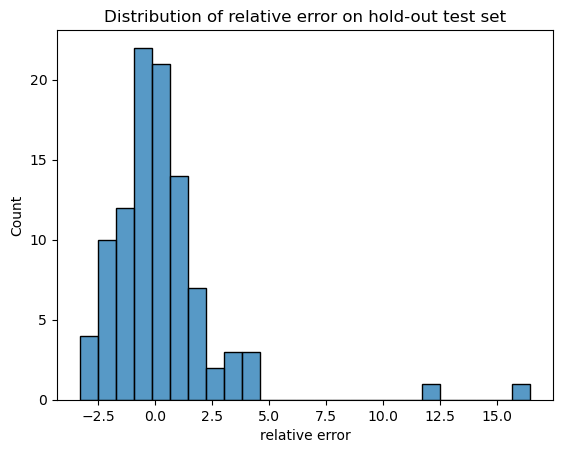

In [44]:
sns.histplot(vis_df["error"])
plt.title("Distribution of relative error on hold-out test set")
plt.xlabel("relative error")

Conclusions:

1. We are considering ridge linear regression as an interpretable linear model, since we have already chosen the features for it during the EDA.
2. The interpretable linear model has poor quality (r^2 = 0.38), so it makes sense to consider a non-interpretable one.
3. Features s_mt and s_mq are only a bit better than the random feature, that is why we do not consider them.
4. The catboost model has r^2 = 0.93, on the hold-out test set. The distribution of errors also looks pretty fine.